In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv('./result-multi.csv')

In [40]:
data = data[data['uptime'] > 0]
data

,rrt sampling,prm sampling,field size,num mobiles,num statics,num obstacles,obstacles,trial,uptime,elapsed time
0,1000,100,"[600, 400]",20,0,0,./obstacles.json,#0,663123,0.117809
1,1000,100,"[600, 400]",20,0,0,./obstacles.json,#1,600058,0.206284
2,1000,100,"[600, 400]",20,0,0,./obstacles.json,#2,619285,0.210210
3,1000,100,"[600, 400]",20,0,0,./obstacles.json,#3,609977,0.178742
4,1000,100,"[600, 400]",20,0,0,./obstacles.json,#4,663594,0.104479
...,...,...,...,...,...,...,...,...,...,...
10784,1000,100,"[600, 400]",40,40,40,./obstacles.json,#84,664678,4.678597
10789,1000,100,"[600, 400]",40,40,40,./obstacles.json,#89,672082,0.884817
10790,1000,100,"[600, 400]",40,40,40,./obstacles.json,#90,656571,0.901929
10791,1000,100,"[600, 400]",40,40,40,./obstacles.json,#91,688070,1.088679


In [41]:
data_mean = data.drop(['trial', 'field size'], axis=1).groupby(
  ['num mobiles', 'num statics', 'num obstacles', 'prm sampling'], as_index=False).mean()
data_mean

,num mobiles,num statics,num obstacles,prm sampling,rrt sampling,uptime,elapsed time
0,20,0,0,100,1000.0,641198.930000,0.152131
1,20,0,5,100,1000.0,630212.194805,0.312000
2,20,0,10,100,1000.0,634620.650794,0.428699
3,20,0,15,100,1000.0,628943.428571,0.513928
4,20,0,20,100,1000.0,640793.166667,0.706851
...,...,...,...,...,...,...,...
102,40,40,20,100,1000.0,691348.041667,3.726443
103,40,40,25,100,1000.0,688607.051282,2.697417
104,40,40,30,100,1000.0,682225.585366,3.103620
105,40,40,35,100,1000.0,682000.838710,2.523113


In [42]:
mean5obs = data_mean.groupby('num obstacles').get_group(5)
mean10obs = data_mean.groupby('num obstacles').get_group(10)

In [43]:
mean5obs

,num mobiles,num statics,num obstacles,prm sampling,rrt sampling,uptime,elapsed time
1,20,0,5,100,1000.0,630212.194805,0.312000
10,20,20,5,100,1000.0,627492.112500,0.298204
19,20,30,5,100,1000.0,638136.173333,0.292134
27,20,40,5,100,1000.0,630138.369863,0.302832
36,30,0,5,100,1000.0,686229.974684,0.940102
45,30,20,5,100,1000.0,685009.072289,0.915231
54,30,30,5,100,1000.0,685775.887500,1.077307
63,30,40,5,100,1000.0,685008.883117,0.905070
72,40,0,5,100,1000.0,699609.243590,2.307293
81,40,20,5,100,1000.0,701803.078947,2.417031


In [44]:
mean10obs

,num mobiles,num statics,num obstacles,prm sampling,rrt sampling,uptime,elapsed time
2,20,0,10,100,1000.0,634620.650794,0.428699
11,20,20,10,100,1000.0,634837.740741,0.371404
20,20,30,10,100,1000.0,625976.049180,0.429678
28,20,40,10,100,1000.0,620380.890909,0.497410
37,30,0,10,100,1000.0,687144.985294,1.804883
46,30,20,10,100,1000.0,683153.762712,1.595351
55,30,30,10,100,1000.0,682500.111111,1.272230
64,30,40,10,100,1000.0,681504.805970,1.194185
73,40,0,10,100,1000.0,696976.406250,3.130840
82,40,20,10,100,1000.0,697681.507937,3.161612


In [45]:
mean10obs['uptime'].values.reshape((3, 4))

array([[634620.65079365, 634837.74074074, 625976.04918033,
        620380.89090909],
       [687144.98529412, 683153.76271186, 682500.11111111,
        681504.80597015],
       [696976.40625   , 697681.50793651, 700229.97058824,
        697902.06451613]])

In [46]:
def plot_uptimes(n_obs):
  data = data_mean.groupby('num obstacles').get_group(n_obs)
  uptimes = data['uptime'].values.reshape((3, 4)) / 3600
  num_mobiles= data['num mobiles'].values
  num_statics = data['num statics'].values

  fig = plt.figure(figsize=(8, 8))
  ax = fig.add_subplot(111)
  ax.imshow(uptimes, cmap='GnBu')
  ax.set_xticks(np.arange(uptimes.shape[1]))
  ax.set_xticklabels(['0', '20', '30', '40'])
  ax.set_yticks(np.arange(uptimes.shape[0]))
  ax.set_yticklabels(['20', '30', '40'])
  ax.set_xlabel('Number of static sensors')
  ax.set_ylabel('Number of mobile sensors')
  ax.set_title('Uptime [hour]')
  
  for i in range(uptimes.shape[0]):
    for j in range(uptimes.shape[1]):
      ax.text(j, i, '{:.2f}'.format(uptimes[i][j]), ha='center', va='center', color='black')
  plt.show()

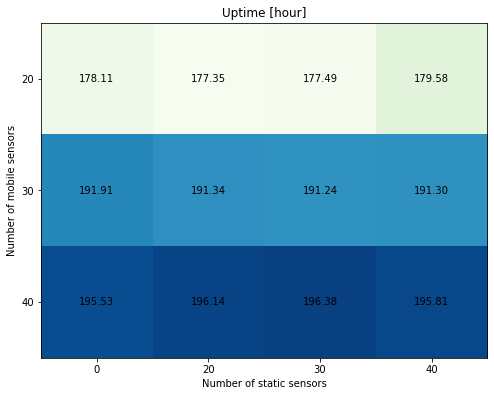

In [47]:
plot_uptimes(0)

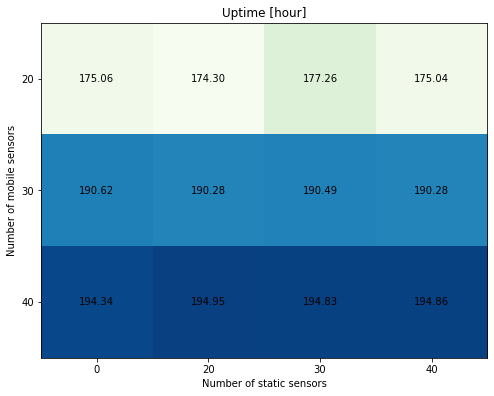

In [48]:

plot_uptimes(5)

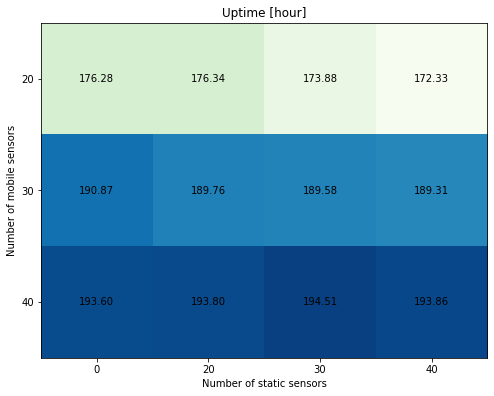

In [49]:
plot_uptimes(10)

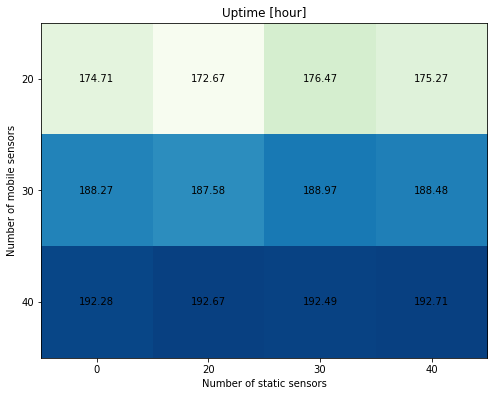

In [50]:
plot_uptimes(15)

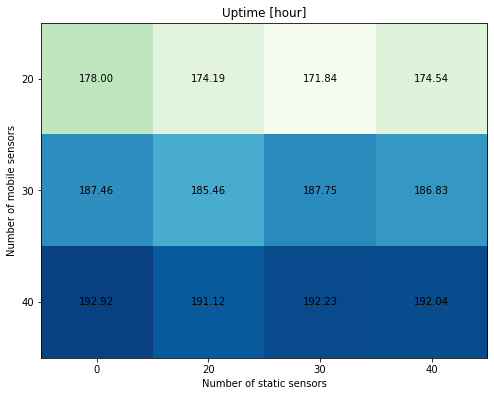

In [51]:

plot_uptimes(20)

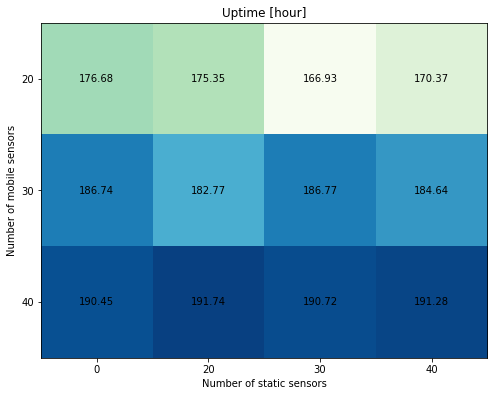

In [52]:

plot_uptimes(25)

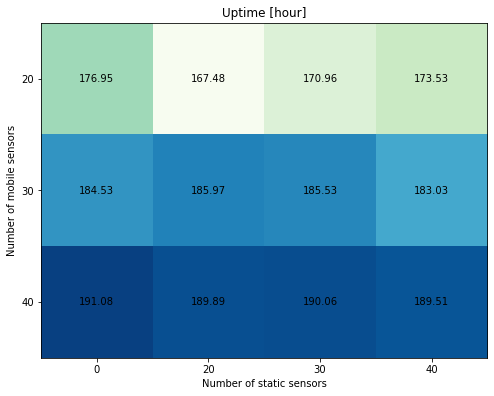

In [53]:
plot_uptimes(30)

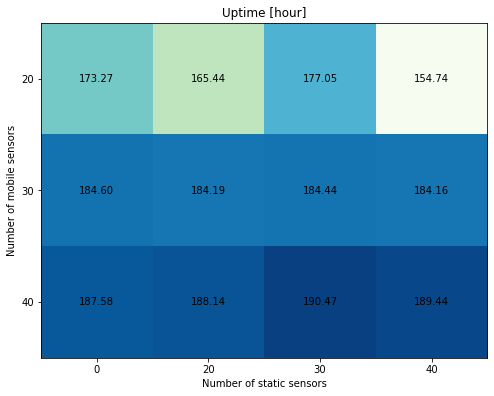

In [54]:

plot_uptimes(35)

In [55]:

plot_uptimes(40)

ValueError: cannot reshape array of size 11 into shape (3,4)

In [56]:
data = pd.read_csv('./result-multi.csv')
data[data['uptime'] > 0].drop(['elapsed time', 'rrt sampling', 'prm sampling', 'field size', 'obstacles', 'trial'], axis=1).groupby(['num mobiles', 'num statics', 'num obstacles']).count()

uptime
num mobiles num statics num obstacles        
20          0           0                 100
                        5                  77
                        10                 63
                        15                 35
                        20                 18
...                                       ...
40          40          20                 48
                        25                 39
                        30                 41
                        35                 31
                        40                 24

[107 rows x 1 columns]